<a href="https://colab.research.google.com/github/Shakil-1501/TSAI/blob/master/S11/S11_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt
import time

In [2]:
!git clone https://github.com/Shakil-1501/TSAI.git

Cloning into 'TSAI'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 229 (delta 27), reused 0 (delta 0), pack-reused 174
Receiving objects: 100% (229/229), 1.73 MiB | 3.75 MiB/s, done.
Resolving deltas: 100% (91/91), done.


In [3]:
from TSAI.S11 import CustomResNet
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Device : ",device)
model = CustomResNet.CustomResNet().to(device)
print("Model Loaded Successfully ")

Device :  cuda
Model Loaded Successfully 


In [4]:
from TSAI.S11 import albumentationstransform
albumentationstransform_train_transforms = albumentationstransform.train_transforms()
from TSAI.S11 import dataloader
trainloader , testloader = dataloader.datasetloader(albumentationstransform_train_transforms , batchsize = 512 , numwork = 4 )
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

REQUIRED LIBRARIES LOADED...


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
INFO : Trainloader and Testloader Done


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.00001 , momentum = 0.9 )

 LR Scheduler Loaded Successfully 


/content/TSAI/S11/CustomResNet.py:57: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Learning rate search finished. See the graph with {finder_name}.plot()


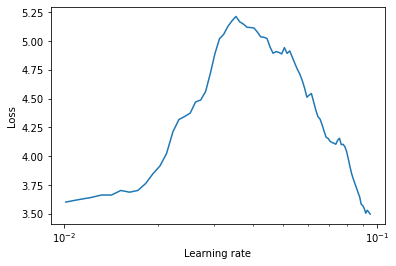

In [ ]:
from TSAI.S11 import LRScheduler
lrfinder = LRScheduler.LRFinder(model, optimizer , criterion , device = "cuda")
lrfinder.range_test(trainloader , end_lr =  0.1 , num_iter = 100 , step_mode = "linear" )
lrfinder.plot()

In [ ]:
lrfinder.reset()

In [ ]:
from TSAI.S11 import traindataset

In [ ]:
print("Devive : ", device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.003 , momentum = 0.95 , weight_decay = 0.01 )
scheduler = torch.optim.lr_scheduler.OneCycleLR( optimizer , max_lr = 0.01 , div_factor = 10 , pct_start  = 5/24 ,
                                                 cycle_momentum = True , epochs = 24 , steps_per_epoch = len(trainloader),
                                                 final_div_factor = 1 , anneal_strategy = 'linear' )

start_time = time.time()
traindataset.traindataset(range_ = 24 , model = model , device = device , 
                          trainloader = trainloader , optimizer = optimizer  , criterion_ = criterion ,
                          batchsize = 512 , scheduler_ = scheduler )
end_time = time.time()
print("Training Time : ",end_time-start_time)

Devive :  cuda


/content/TSAI/S11/CustomResNet.py:57: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


[1,    90] loss: 1.983
[2,    90] loss: 1.248
[3,    90] loss: 1.007
[4,    90] loss: 0.836
[5,    90] loss: 0.709
[6,    90] loss: 0.633
[7,    90] loss: 0.560
[8,    90] loss: 0.516
[9,    90] loss: 0.466
[10,    90] loss: 0.425
[11,    90] loss: 0.399
[12,    90] loss: 0.369
[13,    90] loss: 0.345
[14,    90] loss: 0.329
[15,    90] loss: 0.299
[16,    90] loss: 0.283
[17,    90] loss: 0.271
[18,    90] loss: 0.254
[19,    90] loss: 0.233
[20,    90] loss: 0.224
[21,    90] loss: 0.202
[22,    90] loss: 0.185
[23,    90] loss: 0.168
[24,    90] loss: 0.148
INFO : Finished Training of Dataset 
Training Time :  2392.869616985321


In [ ]:
from TSAI.S11 import testdataset
testdataset.testdataset(model = model , device = device , testloader = testloader )

/content/TSAI/S11/CustomResNet.py:57: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Accuracy of the Network on the 10000 test images: 91 %
